In [1]:
from utils.analyze import load_data, detrend2D, wiener, sensor_function, sample_shape, sgolay2d, interpolate_background
from utils.plot import plot, ProfileBuilder, plot_profile
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
#from scipy.ndimage import imread
#from scipy.ndimage.interpolation import rotate
%matplotlib notebook

In [2]:
x, y, z, T, t, settings = load_data("vergleich")
x = x[0]
y = y[0]
settings = settings[0]
print(len(z))
settings

6


{'change_direction': True,
 'data_logger_channel': 101,
 'data_points': 169,
 'direction': ('x', 'y'),
 'extent': ((36.2, 46.9, 0.1), (16.5, 24.5, 0.1)),
 'mode': 'absolute',
 'sampling_time': 0.256,
 'sensors': ['1161']}

18.872279383116254

<IPython.core.display.Javascript object>


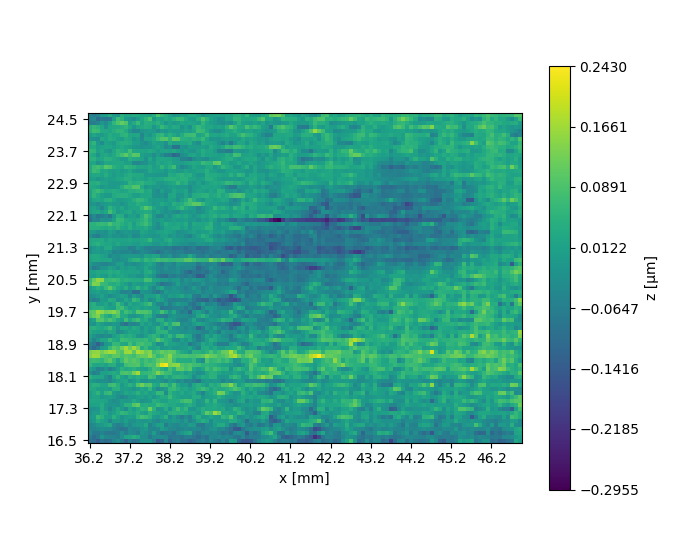

<IPython.core.display.Javascript object>


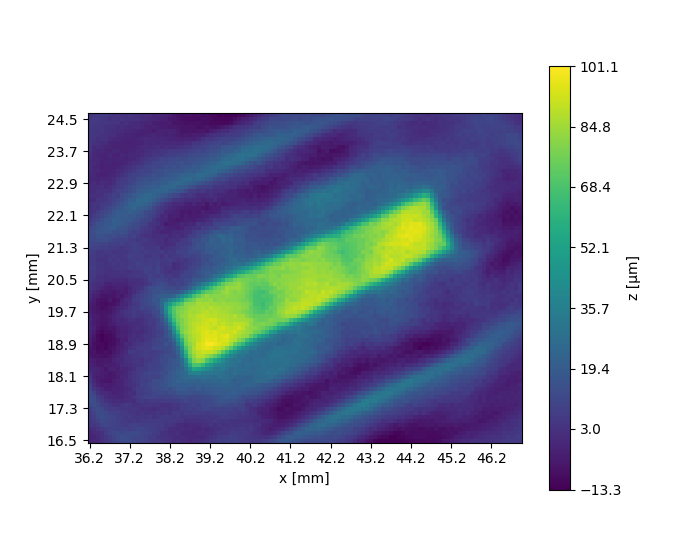

In [133]:
sensor = z[1][0]
background = z[-1][0]
noise = z[3][0] - z[4][0]
noise = detrend2D(noise)
signal = background - sensor
plot(x, y, noise)

stepsize = settings['extent'][0][2]
diameter = 2.57
sigma = 0
factor = 1
theta = 0
phi = 0

kernel = sensor_function(diameter / stepsize, sigma, theta=theta, phi=phi, z0=factor * sensor.mean()/1000/stepsize)
z_reconstructed = wiener(signal, kernel, noise * 0.005, 1, extra=5)
#z_reconstructed = ndi.filters.median_filter(z_reconstructed, 2)
fig, ax = plot(x, y, z_reconstructed)

#profile = ProfileBuilder(fig, ax)

In [77]:
np.arctan((22.63-19.76)/(44.59-38.22)) * 180 / np.pi

24.253919724316557